# Predicting

https://github.com/franciscogaluppo/science-of-science/blob/976cd19aa78fc2e31b480719999cd680f2fd3529/examples/7)%20Comparing%20Methodologies.ipynb

In [1]:
import sys
sys.path.append("../")

from MapSci.papers import papers
from MapSci.research_space import research_space
from MapSci.entities import entities
import MapSci.agg as agg
import MapSci.predict as pr

TEXT

In [16]:
pp = papers("lattes")
maps = research_space("lattes", pp)
maps.compute(2000, 2013)

guevara(2000, 2013, 0.1)
chinazzi(2000, 2013, 0.1, 200)


In [17]:
presence = pp.presence(2008, 2013)
indices = maps.phi["guevara(2000, 2013, 0.1)"][1]
scientists = entities(presence, indices)

In [18]:
inst, st = agg.get_insts(scientists.set, "../dataset/lattes/pesquisadores.csv", sep=";sep;")

xi = agg.aggregate(presence[1], inst)
presence_inst = pp.presence(2008, 2013, x=xi)
institutions = entities(presence_inst, indices)

xs = agg.aggregate(presence[1], st)
presence_st = pp.presence(2008, 2013, x=xs)
states = entities(presence_st, indices)

### Prediction

In [6]:
guev = maps.phi["guevara(2000, 2013, 0.1)"][0]
chin = maps.phi["chinazzi(2000, 2013, 0.1, 200)"][0]

*evaluating the transition from an inactive to an active state*

In [16]:
# Laender
scientists.predict(9089204821424223, guev, 'inactive-active')[:10]

[(0.38988, 'logic'),
 (0.35969, 'museology'),
 (0.32463, 'management information systems'),
 (0.27967, 'e-learning'),
 (0.27764, 'signal processing'),
 (0.27498, 'control and optimization'),
 (0.26516, 'media technology'),
 (0.25271, 'decision sciences (miscellaneous)'),
 (0.25026, 'human-computer interaction'),
 (0.24755, 'discrete mathematics and combinatorics')]

In [17]:
# Ana
scientists.predict(2408991231058279, chin, 'inactive-active')[:10]

[(0.12986, 'computer vision and pattern recognition'),
 (0.12367, 'optometry'),
 (0.11873, 'media technology'),
 (0.11848, 'software'),
 (0.11818, 'information systems'),
 (0.10978, 'logic'),
 (0.10803, 'theoretical computer science'),
 (0.10333, 'computer science (miscellaneous)'),
 (0.09972, 'cognitive neuroscience'),
 (0.09783, 'human-computer interaction')]

*evaluating the transition from an nascent to an developed state*

In [18]:
# Universidade Federal de Minas Gerais
institutions.predict('universidade federal de minas gerais', guev, 'nascent-developed')[:10]

[(0.74262, 'visual arts and performing arts'),
 (0.71929, 'urology'),
 (0.63815, 'human factors and ergonomics'),
 (0.6035, 'e-learning'),
 (0.58332, 'anatomy'),
 (0.56818, 'critical care and intensive care medicine'),
 (0.54714, 'logic'),
 (0.50407, 'anthropology'),
 (0.50121, 'radiological and ultrasound technology'),
 (0.45528, 'issues, ethics and legal aspects')]

*evaluating the transition from an intermediate to an developed state*

In [19]:
# Minas Gerais
states.predict('31', chin, 'intermediate-developed')[:10]

[(0.55771, 'polymers and plastics'),
 (0.53544, 'electrochemistry'),
 (0.53392, 'aquatic science'),
 (0.50784, 'building and construction'),
 (0.50537, 'ecology'),
 (0.49383, 'complementary and alternative medicine'),
 (0.48782, 'nature and landscape conservation'),
 (0.47838, 'multidisciplinary'),
 (0.47827, 'process chemistry and technology'),
 (0.47026, 'bioengineering')]

### Accuracy

TEXT

In [19]:
spaces = [guev, chin]
ground_truth = pp.presence(2014, 2017)
scientists_future = entities(ground_truth, indices)

TEXT

In [20]:
xs = agg.aggregate(ground_truth[1], st)
presence_st_future = pp.presence(2014, 2017, x=xs)
states_future = entities(presence_st_future, indices)

In [21]:
xi = agg.aggregate(ground_truth[1], inst)
presence_inst_future = pp.presence(2014, 2017, x=xi)
institutions_future = entities(presence_inst_future, indices)

TEXT

55869 out of 116677 scores couldn't be computed.


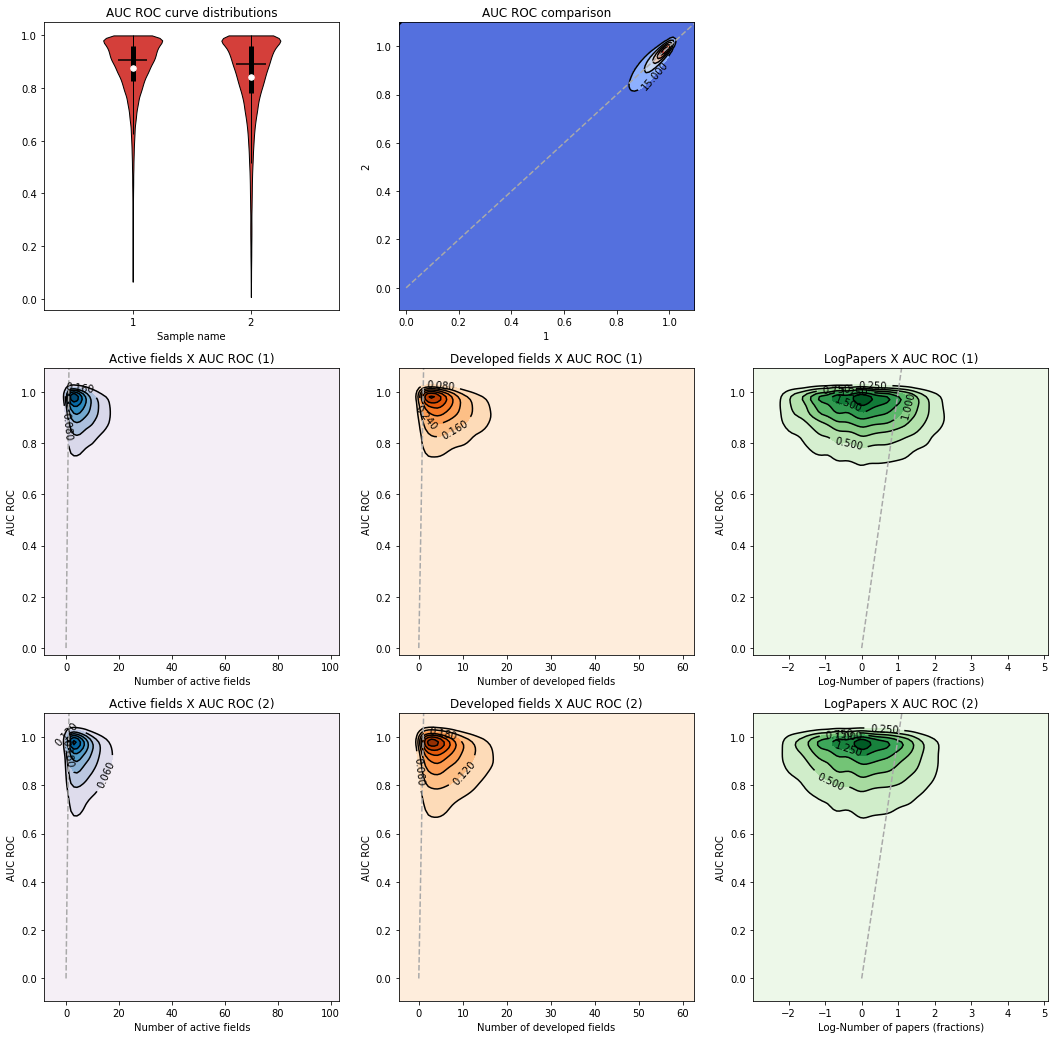

Anova: F_onewayResult(statistic=1522.5647993849898, pvalue=0.0)
Sample size: 60808
Max value [1.0, 1.0]
Mean value [0.8750110866633939, 0.8432307018235963]
Median value [0.9070007089742955, 0.8903654485049834]
Min value [0.06478405315614616, 0.00692041522491349]

Fração menor que 0.5 [0.017810156558347588, 0.04657281936587291]
Fração que foi melhor [0.5967800289435601, 0.3772365478226549]
Fração que foi melhor, acima de 0.5 [0.5829136161448327, 0.3898090935839521]


In [11]:
auc, computed = pr.predict_all(scientists, spaces, indices, 'inactive-active', scientists_future)
pr.plot_comp(auc, scientists, computed)
pr.summary(auc)

TEXT

5503 out of 10641 scores couldn't be computed.


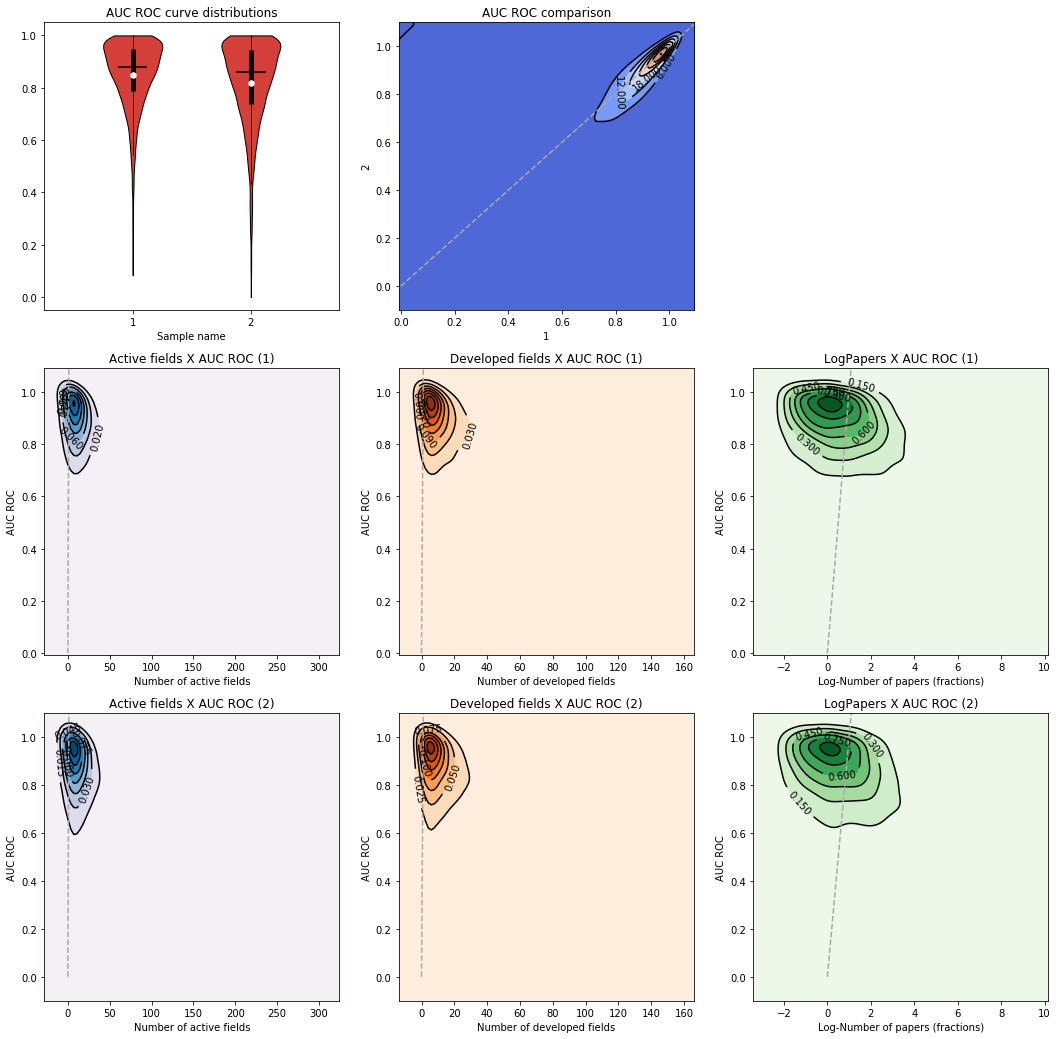

Anova: F_onewayResult(statistic=104.73012053926618, pvalue=1.833656646154413e-24)
Sample size: 5138
Max value [1.0, 1.0]
Mean value [0.848769168605532, 0.8193302533223307]
Median value [0.8788772610909501, 0.8598615502539044]
Min value [0.08333333333333333, 0.0]

Fração menor que 0.5 [0.021603736862592447, 0.04729466718567536]
Fração que foi melhor [0.5998442973919813, 0.3791358505254963]
Fração que foi melhor, acima de 0.5 [0.5883682696259762, 0.38964241676942046]


In [10]:
auc, computed = pr.predict_all(institutions, spaces, indices, 'inactive-active', institutions_future)
pr.plot_comp(auc, institutions, computed)
pr.summary(auc)

TEXT

1 out of 27 scores couldn't be computed.


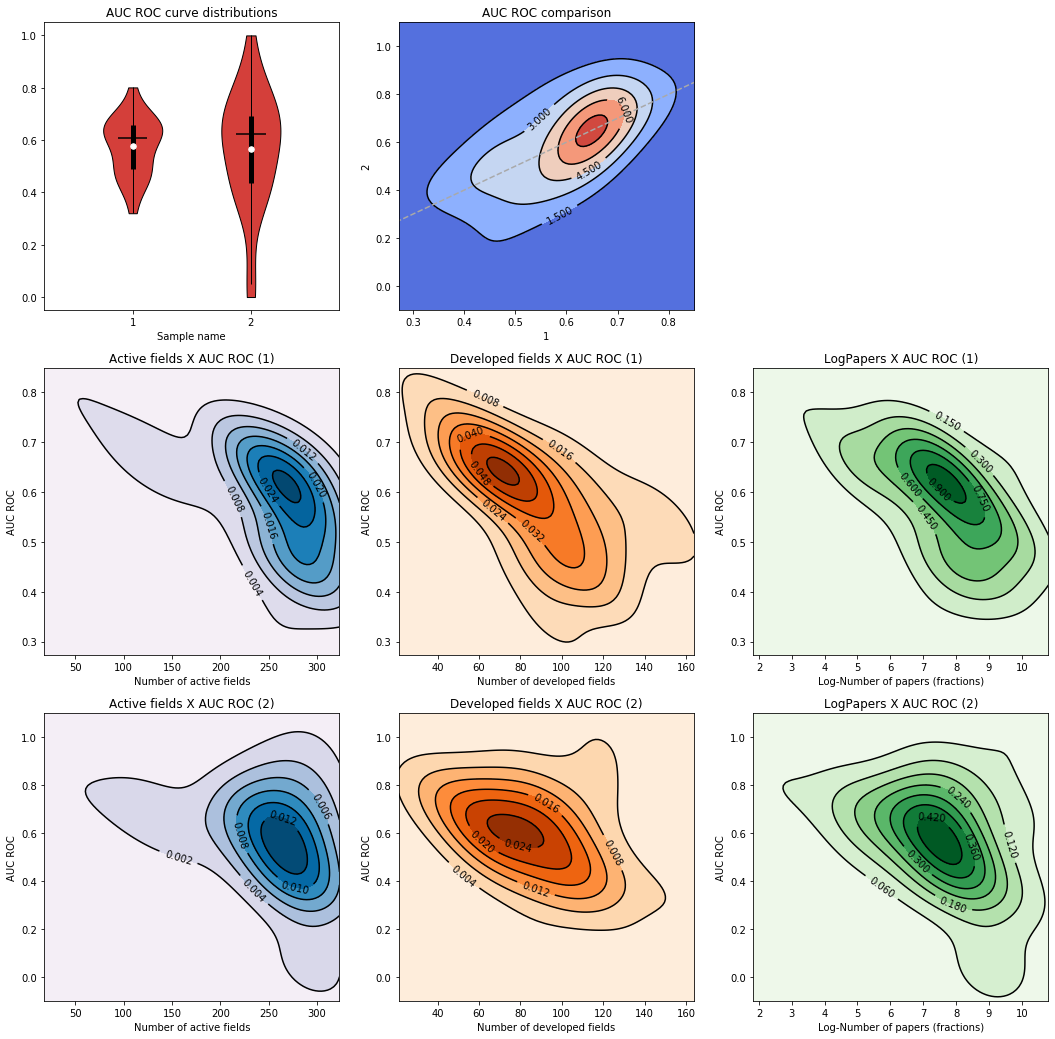

Anova: F_onewayResult(statistic=0.04581752644528523, pvalue=0.8313783683859932)
Sample size: 26
Max value [0.8012295081967213, 1.0]
Mean value [0.576847606648823, 0.5663376227753927]
Median value [0.6095848595848596, 0.6213123793768955]
Min value [0.3203125, 0.0]

Fração menor que 0.5 [0.2692307692307692, 0.34615384615384615]
Fração que foi melhor [0.38461538461538464, 0.5]
Fração que foi melhor, acima de 0.5 [0.2857142857142857, 0.5714285714285714]


In [25]:
auc, computed = pr.predict_all(states, spaces, indices, 'inactive-active', states_future)
pr.plot_comp(auc, states, computed)
pr.summary(auc)

TEXT

10006 out of 10641 scores couldn't be computed.


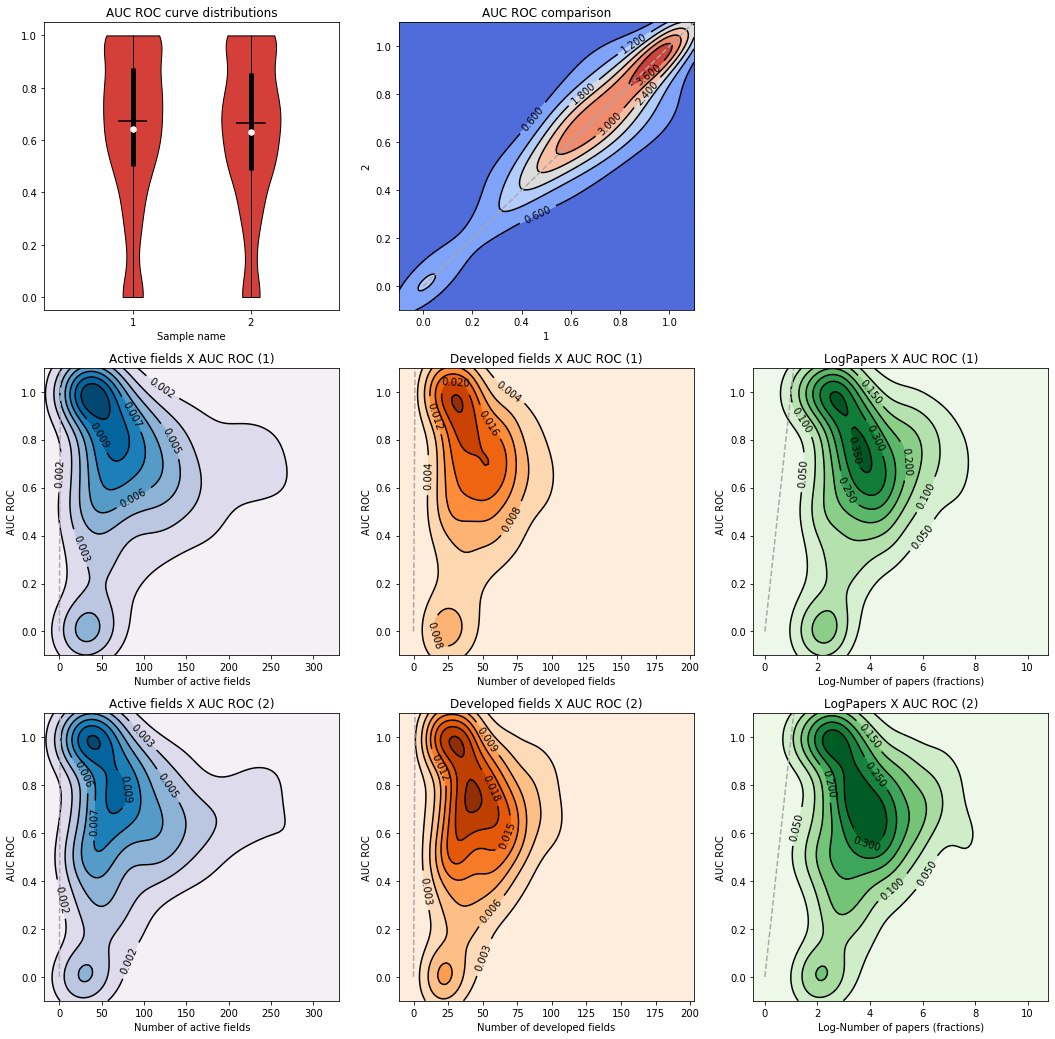

Anova: F_onewayResult(statistic=0.4174557725639663, pvalue=0.5183262156123494)
Sample size: 635
Max value [1.0, 1.0]
Mean value [0.6421333203937827, 0.6315466164122074]
Median value [0.6711590296495956, 0.6666666666666667]
Min value [0.0, 0.0]

Fração menor que 0.5 [0.24881889763779527, 0.2566929133858268]
Fração que foi melhor [0.36850393700787404, 0.38110236220472443]
Fração que foi melhor, acima de 0.5 [0.36272040302267, 0.3904282115869018]


In [24]:
auc, computed = pr.predict_all(institutions, spaces, indices, 'nascent-developed', institutions_future)
pr.plot_comp(auc, institutions, computed)
pr.summary(auc)

TEXT

2 out of 27 scores couldn't be computed.


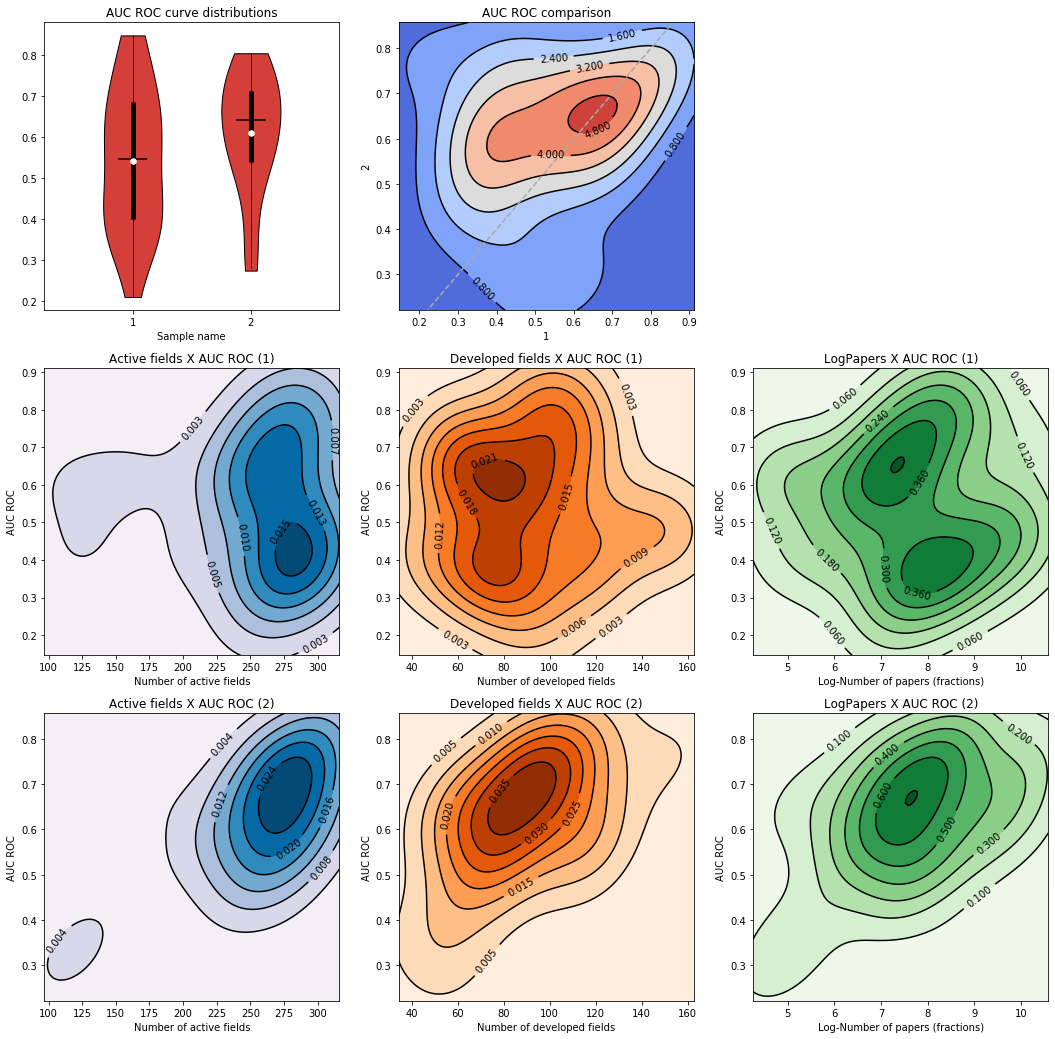

Anova: F_onewayResult(statistic=2.279730901664672, pvalue=0.13762990189845217)
Sample size: 25
Max value [0.8478260869565217, 0.8043478260869565]
Mean value [0.5410879978723927, 0.6094564384331768]
Median value [0.5464285714285715, 0.6405228758169935]
Min value [0.2096774193548387, 0.2740740740740741]

Fração menor que 0.5 [0.44, 0.16]
Fração que foi melhor [0.44, 0.52]
Fração que foi melhor, acima de 0.5 [0.6666666666666666, 0.25]


In [23]:
auc, computed = pr.predict_all(states, spaces, indices, 'nascent-developed', states_future)
pr.plot_comp(auc, states, computed)
pr.summary(auc)

TEXT

9814 out of 10641 scores couldn't be computed.


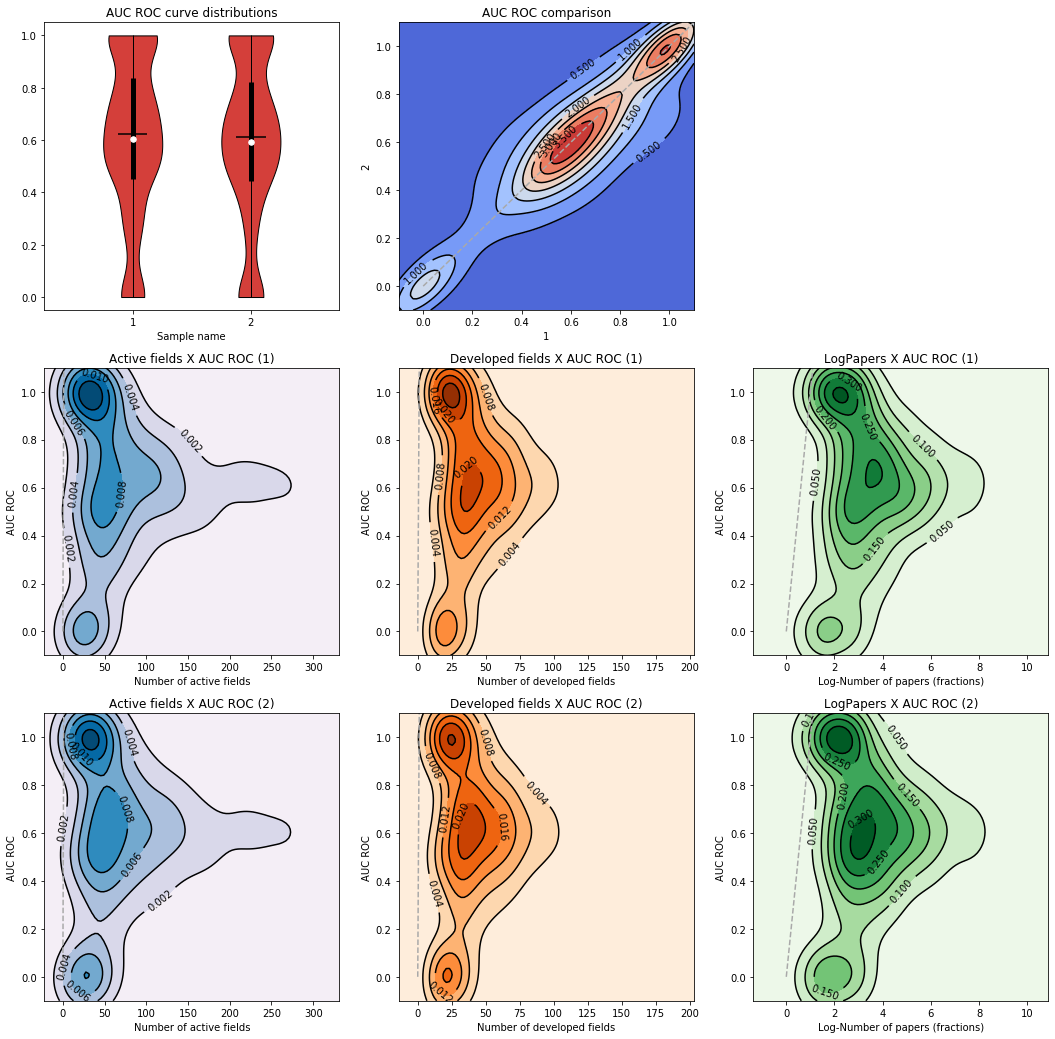

Anova: F_onewayResult(statistic=0.6034287296262618, pvalue=0.43738400319168225)
Sample size: 827
Max value [1.0, 1.0]
Mean value [0.6056880516273452, 0.5939679637489902]
Median value [0.625, 0.6130952380952381]
Min value [0.0, 0.0]

Fração menor que 0.5 [0.2708585247883918, 0.29020556227327693]
Fração que foi melhor [0.3542926239419589, 0.31680773881499397]
Fração que foi melhor, acima de 0.5 [0.3362637362637363, 0.3032967032967033]


In [22]:
auc, computed = pr.predict_all(institutions, spaces, indices, 'intermediate-developed', institutions_future)
pr.plot_comp(auc, institutions, computed)
pr.summary(auc)

TEXT

0 out of 27 scores couldn't be computed.


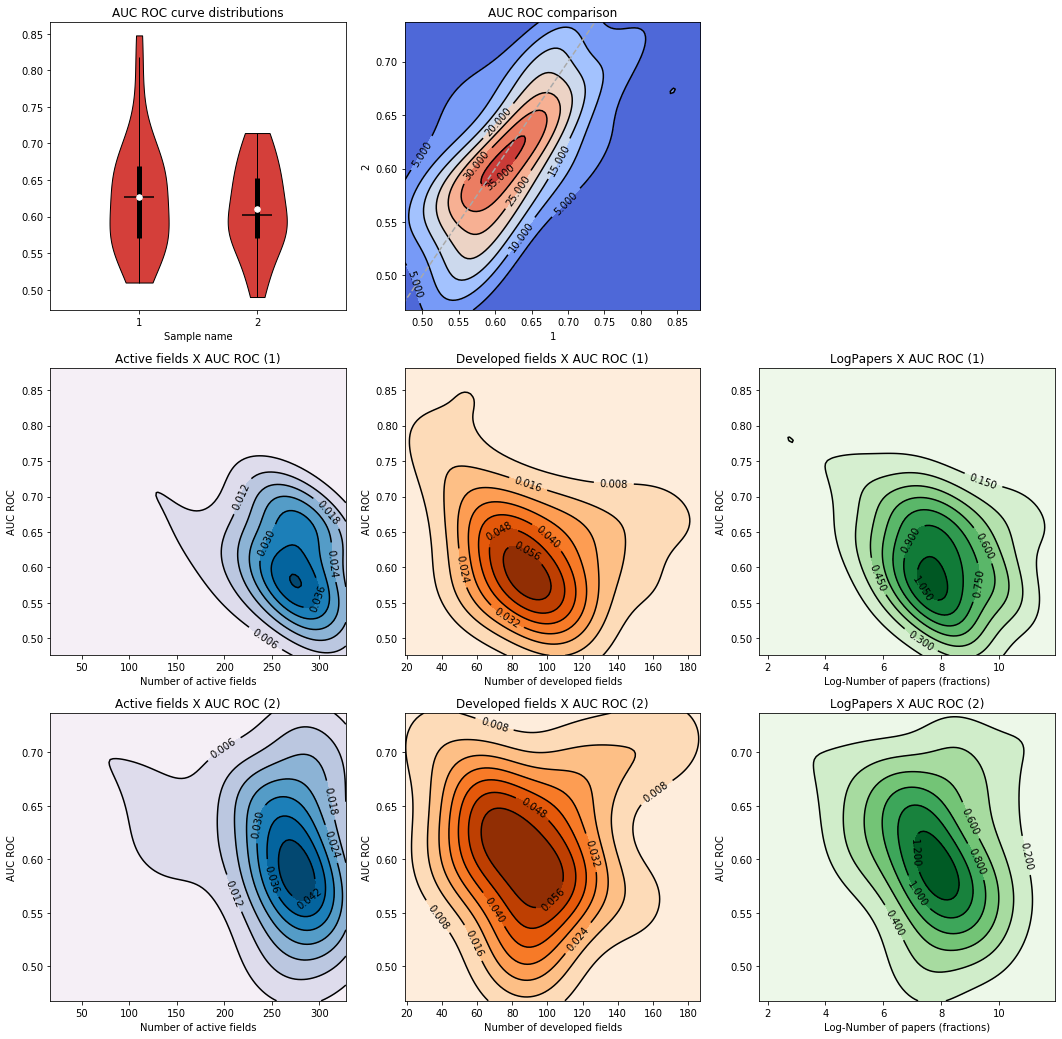

Anova: F_onewayResult(statistic=0.646975532694372, pvalue=0.4248582498534975)
Sample size: 27
Max value [0.8478260869565217, 0.7142857142857143]
Mean value [0.6263917611875868, 0.6109214465251716]
Median value [0.6261384335154827, 0.6023391812865497]
Min value [0.5098291975507574, 0.4900117508813161]

Fração menor que 0.5 [0.0, 0.037037037037037035]
Fração que foi melhor [0.5925925925925926, 0.4074074074074074]
Fração que foi melhor, acima de 0.5 [0.5769230769230769, 0.4230769230769231]


In [21]:
auc, computed = pr.predict_all(states, spaces, indices, 'intermediate-developed', states_future)
pr.plot_comp(auc, states, computed)
pr.summary(auc)

In [24]:
for year in range(1995, 2001):
    maps.compute(year, year+13, model="guevara")

guevara(1995, 2008, 0.1)
guevara(1996, 2009, 0.1)
guevara(1997, 2010, 0.1)
guevara(1998, 2011, 0.1)
guevara(1999, 2012, 0.1)
guevara(2000, 2013, 0.1)


In [25]:
spaces = [
    "guevara(1995, 2008, 0.1)",
    "guevara(1996, 2009, 0.1)",
    "guevara(1997, 2010, 0.1)",
    "guevara(1998, 2011, 0.1)",
    "guevara(1999, 2012, 0.1)",
    "guevara(2000, 2013, 0.1)"
]

spaces = [maps.phi[ss][0] for ss in spaces]

In [ ]:
auc, computed = pr.predict_all(states, spaces, indices, 'intermediate-developed', states_future)
pr.plot_violin(auc)

In [27]:
[ss.shape for ss in spaces]

[(300, 300), (302, 302), (302, 302), (302, 302), (302, 302), (303, 303)]

In [32]:
for n in range(25, 201, 25):
    maps.compute(2000, 2013, model="chinazzi", N=n)

chinazzi(2000, 2013, 0.1, 25)
chinazzi(2000, 2013, 0.1, 50)
chinazzi(2000, 2013, 0.1, 75)
chinazzi(2000, 2013, 0.1, 100)
chinazzi(2000, 2013, 0.1, 125)
chinazzi(2000, 2013, 0.1, 150)
chinazzi(2000, 2013, 0.1, 175)
chinazzi(2000, 2013, 0.1, 200)


In [33]:
spaces = [
    "chinazzi(2000, 2013, 0.1, 25)",
    "chinazzi(2000, 2013, 0.1, 50)",
    "chinazzi(2000, 2013, 0.1, 75)",
    "chinazzi(2000, 2013, 0.1, 100)",
    "chinazzi(2000, 2013, 0.1, 125)",
    "chinazzi(2000, 2013, 0.1, 150)",
    "chinazzi(2000, 2013, 0.1, 175)",
    "chinazzi(2000, 2013, 0.1, 200)"
]

spaces = [maps.phi[ss][0] for ss in spaces]

5503 out of 10641 scores couldn't be computed.


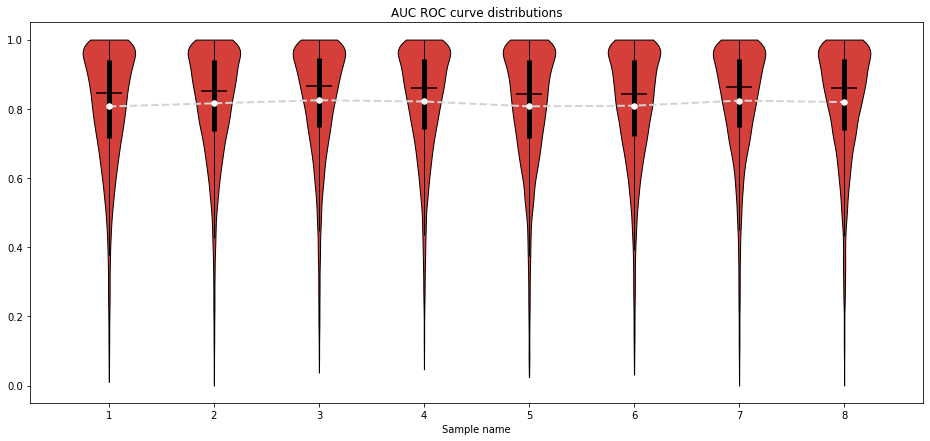

In [37]:
auc, computed = pr.predict_all(institutions, spaces, indices, 'inactive-active', institutions_future)
pr.plot_violin(auc)

In [2]:
pp = papers("lattes")
maps = research_space("lattes", pp)
maps.compute(1995, 2008)

guevara(1995, 2008, 0.1)
chinazzi(1995, 2008, 0.1, 200)


In [3]:
presence = pp.presence(2003, 2008)
indices = maps.phi["guevara(1995, 2008, 0.1)"][1]
scientists = entities(presence, indices)

In [4]:
inst, st = agg.get_insts(scientists.set, "../dataset/lattes/pesquisadores.csv", sep=";sep;")

xi = agg.aggregate(presence[1], inst)
presence_inst = pp.presence(2003, 2008, x=xi)
institutions = entities(presence_inst, indices)

xs = agg.aggregate(presence[1], st)
presence_st = pp.presence(2003, 2008, x=xs)
states = entities(presence_st, indices)

In [6]:
guev = maps.phi["guevara(1995, 2008, 0.1)"][0]
chin = maps.phi["chinazzi(1995, 2008, 0.1, 200)"][0]

In [7]:
ground_truths = [pp.presence(x, x+2) for x in range(2009, 2015)]
scientists_futures = [entities(gt, indices) for gt in ground_truths]

In [8]:
xs = [agg.aggregate(gt[1], st) for gt in ground_truths]
presence_st_future = [pp.presence(None, None, x=xss) for xss in xs]
states_future = [entities(pstf, indices) for pstf in presence_st_future]

In [9]:
xi = [agg.aggregate(gt[1], inst) for gt in ground_truths]
presence_inst_future = [pp.presence(None, None, x=xii) for xii in xi]
institutions_future = [entities(pinstf, indices) for pinstf in presence_inst_future]

6982 out of 9560 scores couldn't be computed.


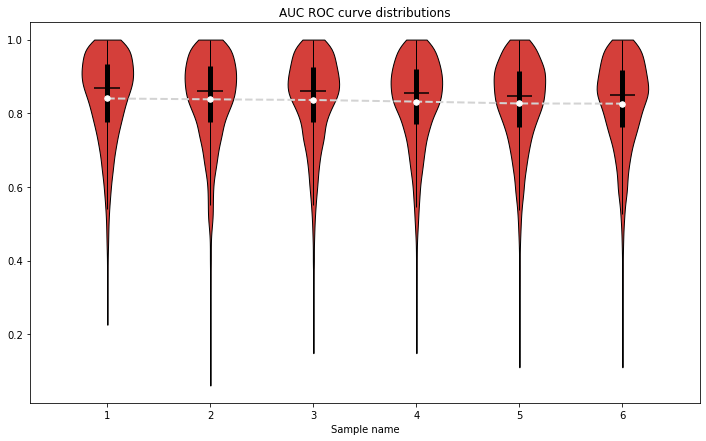

In [15]:
auc = pr.predict_futures(institutions, guev, indices, "inactive-active", institutions_future)
pr.plot_violin(auc)